# Исследование надежности заемщиков.

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
#df = pd.read_csv('data.csv')

df = pd.read_csv('/datasets/data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
print(f'{df.shape[0]} строк, {df.shape[1]} столбцов')

21525 строк, 12 столбцов


В качестве данных, представлен датасет - статистика о платёжеспособности клиентов. Данный датасет имеет следуюзие показатели:
- **children** — количество детей в семье (колличественная переменная, тип: целые числа)
- **days_employed** — общий трудовой стаж в днях (колличественная переменная, тип: вещественные числа)
- **dob_years** — возраст клиента в годах (колличественная переменная, тип: целые числа)
- **education** — уровень образования клиента (категориальная переменная, тип: строки)
- **education_id** — идентификатор уровня образования (колличественная переменная, тип: целые числа)
- **family_status** — семейное положение (категориальная переменная, тип: строки)
- **family_status_id** — идентификатор семейного положения (колличественная переменная, тип: целые числа)
- **gender** — пол клиента (категориальная переменная, тип: строки)
- **income_type** — тип занятости (категориальная переменная, тип: строки)
- **debt** — имел ли задолженность по возврату кредитов (категориальная переменная, тип: целые числа)
- **total_income** — ежемесячный доход (колличественная переменная, тип: вещественные числа)
- **purpose** — цель получения кредита (категориальная переменная, тип: строки)

Посмотрим на пропуски в значениях

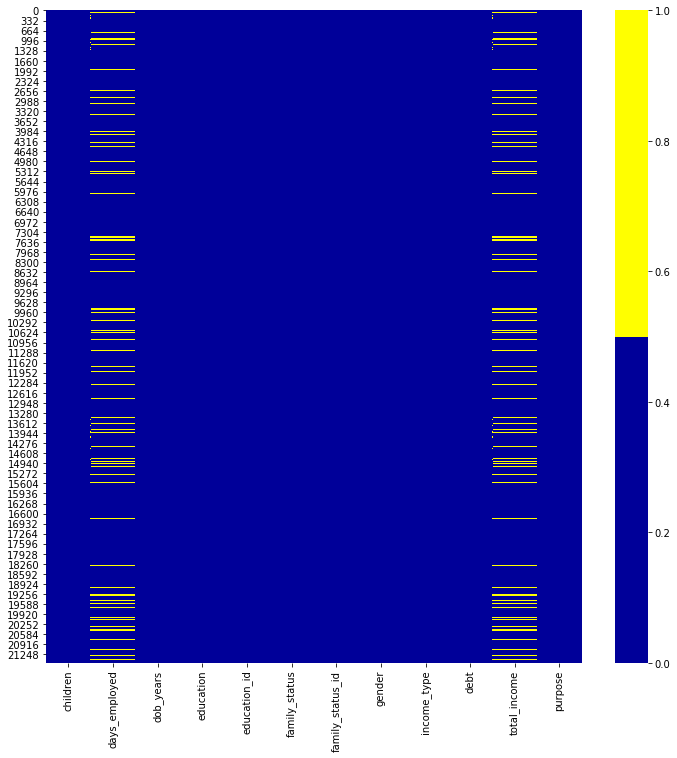

In [5]:
cols = df.columns
colours = ['#000099', '#ffff00']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))
plt.show()

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print(f'{col} - {pct_missing:.02%}')

children - 0.00%
days_employed - 10.10%
dob_years - 0.00%
education - 0.00%
education_id - 0.00%
family_status - 0.00%
family_status_id - 0.00%
gender - 0.00%
income_type - 0.00%
debt - 0.00%
total_income - 10.10%
purpose - 0.00%


In [7]:
 df[df['total_income'].isna()].shape[0]

2174

In [8]:
 df[df['days_employed'].isna()].shape[0]

2174

В датасете присутствуют пропуски в двух столбцах, а именно в столбце со стажем работы (days_employed) и в столбце с ежемесячным доходом,так как количество пропусков одинково, логично предположить, что если нет стажа (значит человек не работает) то нет и дохода.
Проверим

In [9]:
df[(df['days_employed'].isna()) & (df['total_income'].isna())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Собстенно говоря, строк, удовлетворяющих условию запроса о наличии пропуска как в одном так и в другом стобце одновременно, говорит о том что теория об отсутсвии стажа так же говорит и о том что нет дохода. Однако стоит посмотреть на строку income_type (типа занятости) по этим строкам, прежде чем делать выводы.

In [10]:
df[(df['days_employed'].isna()) & (df['total_income'].isna())]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Безработных в этом списке не выявлено, следовательно данные ошибочны, скорее всего человек заполнявший анкету не указал этих данных

### Шаг 2.1 Заполнение пропусков
### Шаг 2.2 Проверка данных на аномалии и исправления.

Я пожалуй объеденю эти два шага, так как они взаимосвязаны

Мы выявили пропуски в двух столбцах, в днях стажа и в месячном доходе, посмотрим на распределение велечин в этих столбцах

In [11]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [12]:
df[['days_employed', 'total_income']].describe().loc[['min','max','mean','50%']]

,days_employed,total_income
min,-18388.949901,2.066726e+04
max,401755.400475,2.265604e+06
mean,63046.497661,1.674223e+05
50%,-1203.369529,1.450179e+05


Странные данные в днях занятости, поглядим на них

In [13]:
df[df['days_employed'] < 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


почти 16 000 отрицательных значений, это странно и не очень понятно. В реальных условиях я бы задал вопросы, но сейчас будем думать что это какая то техническая ошибка. Предлагаю просто убрать минусы (взять модуль) и посмотреть что будет )

In [14]:
df['days_employed'] = df['days_employed'].apply(abs)

In [15]:
df[['days_employed', 'total_income', 'dob_years']].describe().loc[['min','max','mean','50%']]

,days_employed,total_income,dob_years
min,24.141633,2.066726e+04,0.00000
max,401755.400475,2.265604e+06,75.00000
mean,66914.728907,1.674223e+05,43.29338
50%,2194.220567,1.450179e+05,42.00000


Вот так лучше. Однако 401000 дней работы, это забавно, так же имеются люди с возрастом 0

In [16]:
print(f'это всего-то {401755.400475 / 365} лет ))')

это всего-то 1100.699727328767 лет ))


Для начала посмотрим что можно сделать с возрастом

In [17]:
df[df['dob_years'] <= 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье
20462,0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,331741.271455,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


In [18]:
df.groupby('income_type')['dob_years'].median()

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

Думаю что взять медиану по возрасту, в зависимости от типа занятости, нормальная идея

In [19]:
def give_age(row):
    if row['dob_years'] == 0:
        if row['income_type'] == 'безработный':
            return 38
        if row['income_type'] == 'в декрете':
            return 39
        if row['income_type'] == 'госслужащий':
            return 40 
        if row['income_type'] == 'компаньон':
            return 39 
        if row['income_type'] == 'пенсионер':
            return 60 
        if row['income_type'] == 'предприниматель':
            return 42.5 
        if row['income_type'] == 'сотрудник':
            return 39 
        if row['income_type'] == 'студент':
            return 22
    else:
        return row['dob_years']
    

In [20]:
df['dob_years'] = df.apply(give_age, axis=1)

In [21]:
df[df['dob_years'] <= 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Вроде все получилось, посмотрим еще раз

In [22]:
df.groupby('income_type')['dob_years'].median()

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

In [23]:
df[['days_employed', 'total_income', 'dob_years']].describe().loc[['min','max','mean','50%']]

,days_employed,total_income,dob_years
min,24.141633,2.066726e+04,19.000000
max,401755.400475,2.265604e+06,75.000000
mean,66914.728907,1.674223e+05,43.496167
50%,2194.220567,1.450179e+05,43.000000


Посмотрим что там со стажем работы

Посмотрим на данные, близкие к максимальному значению

In [24]:
df[df['days_employed'] >= 401000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
701,0,401446.446720,56,высшее,0,женат / замужем,0,F,пенсионер,0,207240.041495,покупка жилья для сдачи
1184,0,401575.196728,55,среднее,1,гражданский брак,1,M,пенсионер,0,29749.813177,на проведение свадьбы
1723,0,401369.483602,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,137707.931303,дополнительное образование
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
4697,0,401635.032697,56,среднее,1,женат / замужем,0,F,пенсионер,0,48242.322502,покупка недвижимости
4839,0,401321.964602,65,среднее,1,женат / замужем,0,F,пенсионер,0,190439.131956,на покупку автомобиля
4949,0,401573.905288,54,среднее,1,женат / замужем,0,F,пенсионер,0,52927.428675,покупка коммерческой недвижимости
5716,0,401524.259153,57,среднее,1,вдовец / вдова,2,F,пенсионер,0,143342.778458,приобретение автомобиля
5762,0,401381.736156,52,среднее,1,женат / замужем,0,F,пенсионер,0,44999.213386,строительство жилой недвижимости
5805,0,401063.804512,67,высшее,0,вдовец / вдова,2,F,пенсионер,0,454492.131137,покупка жилья для сдачи


Это явно какие то проблемы в данных, ведь такой трудовой стаж просто не возможен

Пожалуй стоит оставить только те данные, где максимальный стаж не превышает возраст - 16 лет (допустим что трудовой стаж начинается с 16 лет)

In [25]:
df[df['days_employed'] > (df['dob_years'] - 16) * 365]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


цифры явно не адекватны, столько не то что-бы не работают, столько даже не живут )) В чем тут проблема не понятно, либо сбой, либо ошибка в еденицах измерения

Поглядим на средние и медианные значения без учетов выбросов

Чтобы определить среднию или медианную величину стажа, необходимо категоризировать людей по возрасту

Введем следующие категории:
- до 18 лет - дети
- от 19 до 64 - взрослые
- от 64 - пенсионеры

In [26]:
def ages_category(age):
    if age < 18:
        return 'ребенок'
    if age < 64:
        return 'взрослый'
    else:
        return 'пенсионер'

In [27]:
df['age_category'] = df['dob_years'].apply(ages_category)

In [28]:
df[df['days_employed'] <= (df['dob_years'] - 16) * 365].groupby('age_category')['days_employed'].median()

age_category
взрослый     1612.416835
пенсионер    2579.458493
Name: days_employed, dtype: float64

In [29]:
print(f'Медианное значение стажа у взрослых {round(1612 / 365, 2)} лет')

Медианное значение стажа у взрослых 4.42 лет


In [30]:
print(f'Медианное значение стажа у пенсионеровretiree {round(2579 / 365, 2)} лет')

Медианное значение стажа у пенсионеровretiree 7.07 лет


In [31]:
adult = round(df[df['days_employed'] <= (df['dob_years'] - 16) * 365].groupby('age_category')['days_employed'].median()[0])
retiree = round(df[df['days_employed'] <= (df['dob_years'] - 16) * 365].groupby('age_category')['days_employed'].median()[1])

In [32]:
def days_employed(row):
    if row['days_employed'] > (row['dob_years'] - 16) * 365:
        if row['age_category'] == 'взрослый':
            return adult
        if row['age_category'] == 'пенсионер':
            return retiree
    else:
        return row['days_employed']

In [33]:
df['days_employed'] = df.apply(days_employed, axis=1)

In [34]:
df[['days_employed', 'total_income', 'dob_years']].describe().loc[['min','max','mean','50%']]

,days_employed,total_income,dob_years
min,24.141633,2.066726e+04,19.000000
max,16119.687737,2.265604e+06,75.000000
mean,2229.677681,1.674223e+05,43.496167
50%,1612.000000,1.450179e+05,43.000000


Заменим пропуски в соответсвии с категорией возраста медианными значениями

In [35]:
df.loc[df['days_employed'].isna(), 'days_employed'] = df.groupby('age_category')['days_employed'].transform('median')

Проверим, пенсионер

In [36]:
df.loc[12]

children                           0
days_employed                   2579
dob_years                         65
education                    среднее
education_id                       1
family_status       гражданский брак
family_status_id                   1
gender                             M
income_type                пенсионер
debt                               0
total_income                     NaN
purpose              сыграть свадьбу
age_category               пенсионер
Name: 12, dtype: object

Взрослый

In [37]:
df.loc[26]

children                          0
days_employed                  1612
dob_years                        41
education                   среднее
education_id                      1
family_status       женат / замужем
family_status_id                  0
gender                            M
income_type             госслужащий
debt                              0
total_income                    NaN
purpose                 образование
age_category               взрослый
Name: 26, dtype: object

In [38]:
df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


сделаем тоже самое с доходом, но в качестве категории возьмем тип занятости

In [39]:
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
12,0,2579.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу,пенсионер
26,0,1612.0,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование,взрослый
29,0,1612.0,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости,взрослый
41,0,1612.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем,взрослый
55,0,1612.0,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу,взрослый
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,1612.0,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем,взрослый
21495,1,1612.0,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба,взрослый
21497,0,1612.0,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости,взрослый
21502,1,1612.0,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости,взрослый


In [40]:
df.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [41]:
df.loc[df['total_income'].isna(), 'total_income'] = df.groupby('income_type')['total_income'].transform('median')

Проверим

In [42]:
df.loc[12]

children                           0
days_employed                   2579
dob_years                         65
education                    среднее
education_id                       1
family_status       гражданский брак
family_status_id                   1
gender                             M
income_type                пенсионер
debt                               0
total_income                  118514
purpose              сыграть свадьбу
age_category               пенсионер
Name: 12, dtype: object

In [43]:
df.loc[26]

children                          0
days_employed                  1612
dob_years                        41
education                   среднее
education_id                      1
family_status       женат / замужем
family_status_id                  0
gender                            M
income_type             госслужащий
debt                              0
total_income                 150448
purpose                 образование
age_category               взрослый
Name: 26, dtype: object

Вроде все норм

In [44]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print(f'{col} - {pct_missing:.02%}')

children - 0.00%
days_employed - 0.00%
dob_years - 0.00%
education - 0.00%
education_id - 0.00%
family_status - 0.00%
family_status_id - 0.00%
gender - 0.00%
income_type - 0.00%
debt - 0.00%
total_income - 0.00%
purpose - 0.00%
age_category - 0.00%


Посмотрим на количество детей

In [45]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

20 детей О_о

Так же пристуствуют отрицательные значения

In [46]:
df[df['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
606,20,880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья,взрослый
720,20,855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости,взрослый
1074,20,3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования,взрослый
2510,20,2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью,взрослый
2941,20,2161.591519,39,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля,взрослый
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,1240.257910,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль,взрослый
21325,20,601.174883,37,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование,взрослый
21390,20,1612.000000,53,среднее,1,женат / замужем,0,M,компаньон,0,172357.950966,покупка жилой недвижимости,взрослый
21404,20,494.788448,52,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью,взрослый


Честно говоря, я даже не знаю баг это или нет, но скорее всего это какой то сбой или ошибка в заполнении, думаю что тут 0 лишний, поправьте если я ошибаюсь, в реальных условиях я бы посоветовался со старшими коллегами ))

Заменим их на 2ух детей

In [47]:
df.loc[df['children'] == 20, 'children'] = 2

In [48]:
df['children'] = df['children'].apply(abs)

In [49]:
df['children'].value_counts().to_frame()

,children
0,14149
1,4865
2,2131
3,330
4,41
5,9


Пропуски заполнили, анамалии устранили, данные не потеряли

### Шаг 2.3. Изменение типов данных.

In [50]:
df['total_income'] = df['total_income'].astype(int)

In [51]:
df['education'] = df['education'].str.lower()

### Шаг 2.4. Удаление дубликатов.

Посмотрим есть ли дубликаты

In [52]:
df.duplicated().sum()

71

In [53]:
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
2849,0,1612.0,41,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для семьи,взрослый
3290,0,1612.0,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу,взрослый
4182,1,1612.0,34,высшее,0,гражданский брак,1,F,сотрудник,0,142594,свадьба,взрослый
4851,0,1612.0,60,среднее,1,гражданский брак,1,F,пенсионер,0,118514,свадьба,взрослый
5557,0,1612.0,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу,взрослый
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,2579.0,64,среднее,1,женат / замужем,0,F,пенсионер,0,118514,дополнительное образование,пенсионер
21032,0,1612.0,60,среднее,1,женат / замужем,0,F,пенсионер,0,118514,заняться образованием,взрослый
21132,0,1612.0,47,среднее,1,женат / замужем,0,F,сотрудник,0,142594,ремонт жилью,взрослый
21281,1,1612.0,30,высшее,0,женат / замужем,0,F,сотрудник,0,142594,покупка коммерческой недвижимости,взрослый


Есть дублирующиеся строки, удалим их встроенными методами пандас

In [54]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)

In [55]:
df.duplicated().sum()

0

Проверим есть ли дублирующиеся категории

In [56]:
df['education'].value_counts().to_frame()

,education
среднее,15172
высшее,5250
неоконченное высшее,744
начальное,282
ученая степень,6


In [57]:
df['family_status'].value_counts().to_frame()

,family_status
женат / замужем,12339
гражданский брак,4151
Не женат / не замужем,2810
в разводе,1195
вдовец / вдова,959


In [58]:
df['income_type'].value_counts().to_frame()

,income_type
сотрудник,11084
компаньон,5078
пенсионер,3829
госслужащий,1457
предприниматель,2
безработный,2
в декрете,1
студент,1


In [59]:
df['purpose'].value_counts().to_frame()

,purpose
свадьба,791
на проведение свадьбы,768
сыграть свадьбу,765
операции с недвижимостью,675
покупка коммерческой недвижимости,661
операции с жильем,652
покупка жилья для сдачи,651
операции с коммерческой недвижимостью,650
покупка жилья,646
жилье,646


Дублирующихся категорий я не нашел нигде, кроме цели кредита, но там все пишут кто во что горазд, с этим разберемся позже

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [60]:
df.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,взрослый


In [61]:
education_id = df[['education', 'education_id']].drop_duplicates(keep='first').reset_index(drop=True)
education_id

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [62]:
family_status_id = df[['family_status', 'family_status_id']].drop_duplicates(keep='first').reset_index(drop=True)
family_status_id

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [63]:
df.drop(columns = ['family_status', 'education'],axis = 1, inplace=True)

In [64]:
df.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,взрослый
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,взрослый
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,взрослый
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,взрослый
4,0,1612.000000,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,взрослый


### Шаг 2.6. Категоризация дохода.

- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

In [65]:
def income_category(row):
    if row <= 30000:
        return 'E'
    if row <= 50000:
        return 'D'
    if row <= 200000:
        return 'C'
    if row <= 1000000:
        return 'B'
    else:
        return 'A'
       

In [66]:
df['income_category'] = df['total_income'].apply(income_category)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_category,income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,взрослый,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,взрослый,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,взрослый,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,взрослый,B
4,0,1612.000000,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,взрослый,C


In [67]:
income_category(25000)

'E'

In [68]:
income_category(235000)

'B'

### Шаг 2.7. Категоризация целей кредита.

In [69]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [70]:
def purpose_category(row):
    if 'жиль' in row or 'движ' in row:
        return 'операции с недвижимостью'
    if 'мобил' in row:
        return 'операции с автомобилем'
    if 'вадьб' in row:
        return 'проведение свадьбы'
    if 'разов' in row:
        return 'получение образования'

In [71]:
df['purpose_category'] = df['purpose'].apply(purpose_category)
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_category,income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,взрослый,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,взрослый,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,взрослый,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,взрослый,B,получение образования
4,0,1612.000000,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,взрослый,C,проведение свадьбы
5,0,926.185831,27,0,1,M,компаньон,0,255763,покупка жилья,взрослый,B,операции с недвижимостью
6,0,2879.202052,43,0,0,F,компаньон,0,240525,операции с жильем,взрослый,B,операции с недвижимостью
7,0,152.779569,50,1,0,M,сотрудник,0,135823,образование,взрослый,C,получение образования
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,взрослый,C,проведение свадьбы
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,взрослый,C,операции с недвижимостью


In [72]:
df[df['purpose_category'].isna()]

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_category,income_category,purpose_category


Все категоризовалось, посему я бы убрал столбец purpose

In [73]:
df.drop(columns = ['purpose'],axis = 1, inplace=True)

In [74]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,age_category,income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,взрослый,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,взрослый,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,взрослый,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,взрослый,B,получение образования
4,0,1612.000000,53,1,1,F,пенсионер,0,158616,взрослый,C,проведение свадьбы


## Посмотрим зависимости

(7.5, -0.5)

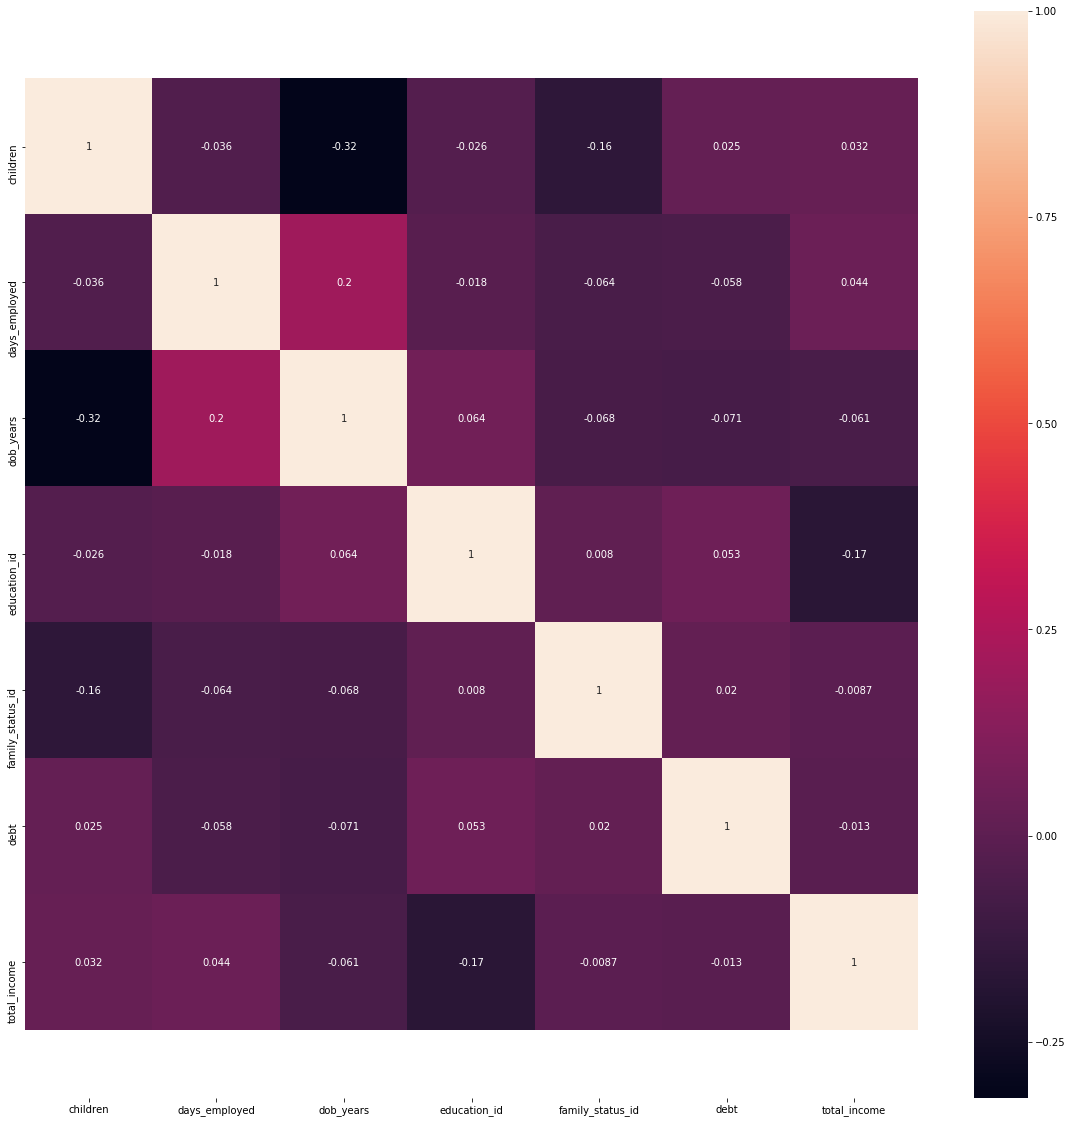

In [75]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2g')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Есть замечательная шкала Чеддока, которая говорит о силе зависимости одного фактора от другого, ей и воспользуемся

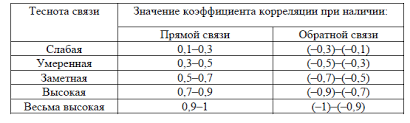

На случай если картинка не загрузится:
 - Слабая связь от 0.1 до 0.3
 - Умеренная связь от 0.3 до 0.5
 - Заметная связь от 0.5 до 0.7
 - Высокая связь 0.7 до 0.9
 - Весьма высокая от 0.9 до 1

Подготовим наш датасет, превратим категориальные признаки в нули и единицы (двойки, тройки ))

In [76]:
df.head(2)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,age_category,income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,взрослый,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,взрослый,C,операции с автомобилем


In [77]:
data = df.copy()

In [78]:

data['gender'] = data['gender'].apply(lambda x: 0 if x == 'F' else 1)

data['income_type'] = data['income_type'].apply(lambda x: 0 if x == 'сотрудник' else 
                                                1 if x == 'пенсионер' else 
                                                2 if x == 'компаньон' else 
                                                3 if x == 'госслужащий' else 
                                                5 if x == 'безработный' else 
                                                6 if x == 'предприниматель' else 
                                                7 if x == 'студент' else
                                                8 if x == 'в декрете' else 9)

data['age_category'] = data['age_category'].apply(lambda x: 0 if x == 'взрослый' else 1)

data['income_category'] = data['income_category'].apply(lambda x: 0 if x == 'B' else 
                                                        1 if x == 'C' else 
                                                        2 if x == 'D' else 
                                                        3 if x == 'E' else 
                                                        4 if x == 'A' else 5)


data['purpose_category'] = data['purpose_category'].apply(lambda x: 0 if x == 'операции с недвижимостью' else 
                                                        1 if x == 'операции с автомобилем' else 
                                                        2 if x == 'получение образования' else 
                                                        3 if x == 'проведение свадьбы' else 4)

In [79]:
cols = list(data.columns)

cols.remove('debt')

In [80]:
level = 0.05
for i in cols:
    curr_corr = data[i].corr(data.debt)
    if abs(curr_corr) >= level:        
        print(f"Коэффициент корреляции просрочки к {i} составляет {round(curr_corr, 2)}")
        

Коэффициент корреляции просрочки к days_employed составляет -0.06
Коэффициент корреляции просрочки к dob_years составляет -0.07
Коэффициент корреляции просрочки к education_id составляет 0.05
Коэффициент корреляции просрочки к gender составляет 0.06


Выявленные зависимости довольно слабые, однако стоит их перечислить все же:
- обратная зависимость просрочки к трудовому стажу, чем выше стаж, тем меньше шанс просрочки
- обратная зависимость к возрасту дебитора
- Так же есть зависимость в уровне образования
- Зависимость от пола персонажа

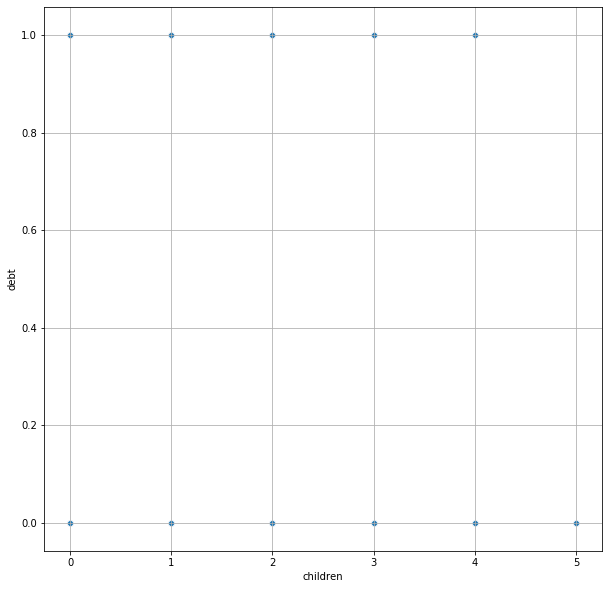

In [81]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['debt'], x =data['children'])
plt.grid()

В представленном датасете, клиенты у которых 5 детей, не выходили на просрочку

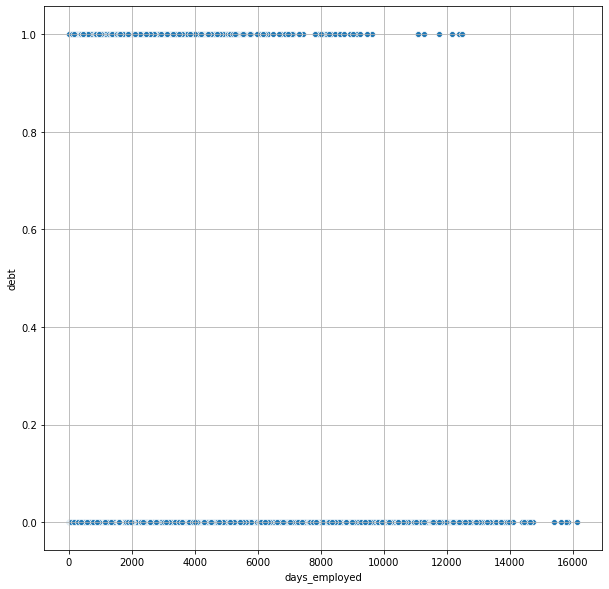

In [82]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['debt'], x =data['days_employed'])
plt.grid()

Странно, но не выявлено людей которые допускали просрочку, с трудовым стажем примерно от 9000 до 11 000 дней, а так же выше 13 000. Напрашивается вывод, что чем выше тсаж работы, тем выше шанс возврата кредита

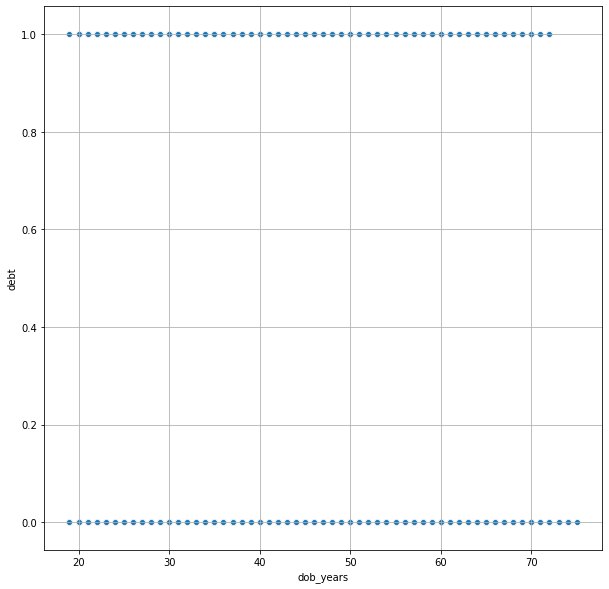

In [83]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['debt'], x = data['dob_years'])
plt.grid()

По возрасту расклад примерно одинаковый, однако люди старше 75 и выше в данном датасете не допускали просрочек

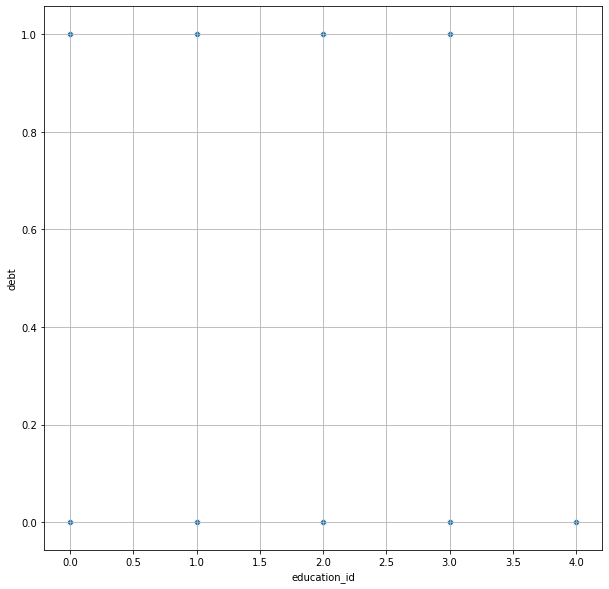

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['debt'], x = data['education_id'])
plt.grid()

Люди с докторской степенью в данном датасете не допускали просрочек, особой зависимости от образования и наличие просрочек я не выявил.

### Посмотрим на влияние количества детей и возврат кредита в срок

In [85]:
df.groupby('children')['debt'].count().to_frame()

,debt
children,
0,14091
1,4855
2,2128
3,330
4,41
5,9


Количество клиентов распределено сильно не равномерно, будем искать процентное соотношение

Найдет процентное соотношение от общего количества к количеству просрочек, сгруппированных по количеству детей

In [86]:
((df.groupby('children')['debt'].sum() / df.groupby('children')['debt'].count() ) * 100).to_frame().sort_values(by='debt')

,debt
children,
5,0.000000
0,7.543822
3,8.181818
1,9.165808
2,9.492481
4,9.756098


In [87]:
draw =((df.groupby('children')['debt'].sum() / df.groupby('children')['debt'].count() ) * 100).to_frame().sort_values(by='debt')

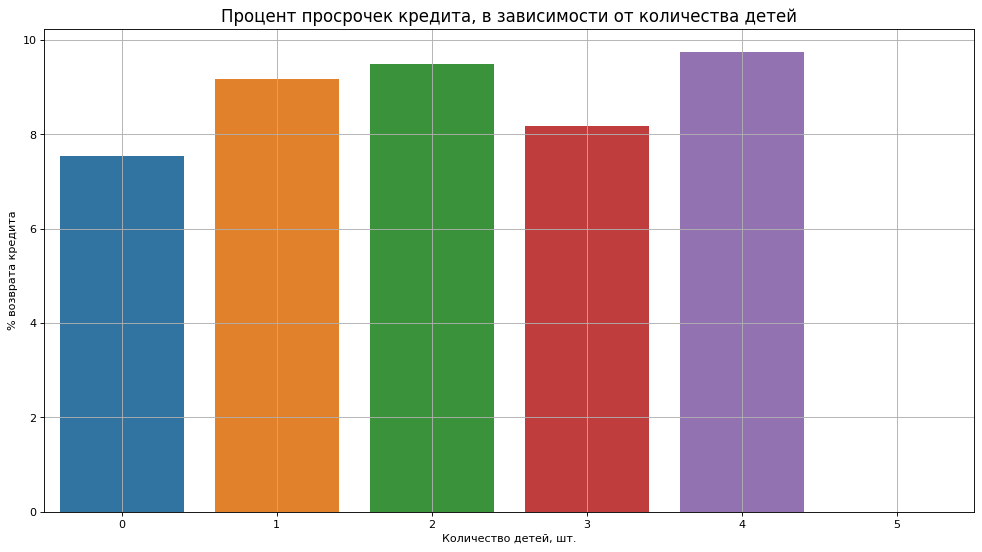

In [88]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.barplot(x=draw.index, y=draw['debt'])
ax.set_title('Процент просрочек кредита, в зависимости от количества детей', fontsize=15)
ax.set_ylabel('% возврата кредита', fontsize=10)
ax.set_xlabel('Количество детей, шт.', fontsize=10)
ax.tick_params(labelsize=10)
plt.grid()

Утверждать что чем больше детей, тем выше шанс просрочки кредита, по момему мнению не обосновано, однако, все же стоит заметить, что те клиенты у которых нет детей, допускают просрочки все же немного реже чем те у кого они есть. 

Клиенты с тремя детьми, идут на втором месте по количеству возвращенных кредитов

Клиентов с 5 детьми всего пятеро, этого мало что-бы делать какие длибо выводы по даной группе, стоит правда отметить, что в этой группе, в этом конкретном датасете, небыло просрочек )

### Посмотрим на зависимость между семейным положением и возвратом кредита в срок

In [89]:
df.head(1)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,age_category,income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,взрослый,B,операции с недвижимостью


In [90]:
df.groupby('family_status_id')['debt'].count().to_frame()

,debt
family_status_id,
0,12339
1,4151
2,959
3,1195
4,2810


In [91]:
draw = ((df.groupby('family_status_id')['debt'].sum() / df.groupby('family_status_id')['debt'].count() ) * 100
       ).to_frame().sort_values(by='debt')

In [92]:
draw

,debt
family_status_id,
2,6.569343
3,7.112971
0,7.545182
1,9.347145
4,9.750890


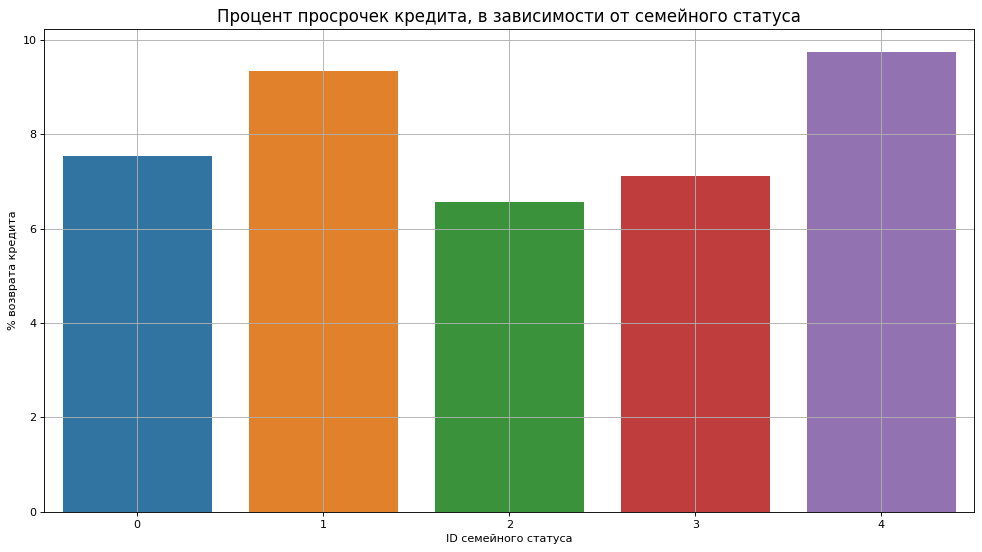

In [93]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.barplot(x=draw.index, y=draw['debt'])
ax.set_title('Процент просрочек кредита, в зависимости от семейного статуса', fontsize=15)
ax.set_ylabel('% возврата кредита', fontsize=10)
ax.set_xlabel('ID семейного статуса', fontsize=10)
ax.tick_params(labelsize=10)
plt.grid()

In [94]:
family_status_id

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Странное наблюдение - клиенты, которые являются вдовами/вдовцами чаще всего платят кредит вовремя

Самый высокий прцоент просроченных кредитов - у не женатых/ не замужних клиентов

### Проверим уровень зависимости возварат по уровню дохода

In [95]:
df.head(1)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,age_category,income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,взрослый,B,операции с недвижимостью


In [96]:
df.groupby('income_category')['debt'].count().to_frame()

,debt
income_category,
A,25
B,5042
C,16015
D,350
E,22


In [97]:
draw = ((df.groupby('income_category')['debt'].sum() / df.groupby('income_category')['debt'].count() ) * 100
       ).to_frame().sort_values(by='debt')
draw

,debt
income_category,
D,6.000000
B,7.060690
A,8.000000
C,8.492039
E,9.090909


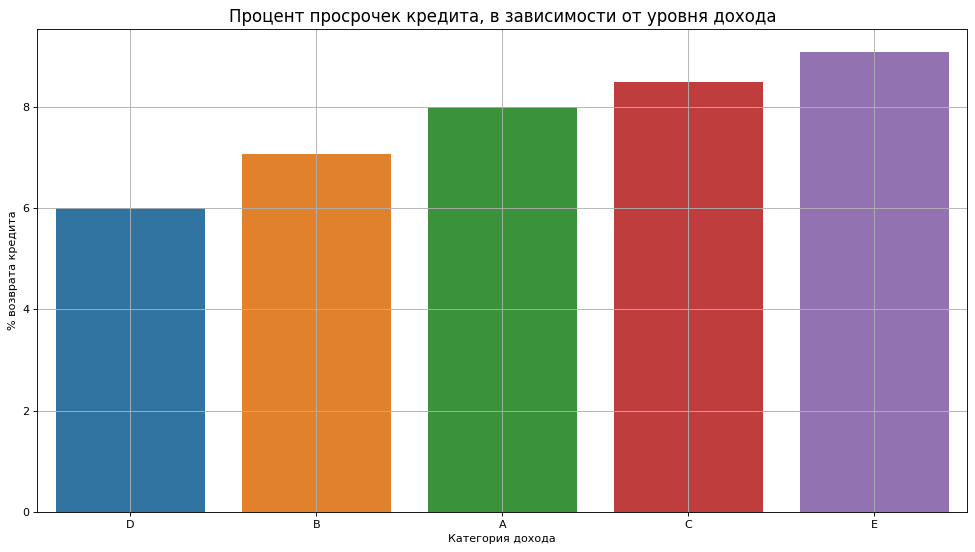

In [98]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.barplot(x=draw.index, y=draw['debt'])
ax.set_title('Процент просрочек кредита, в зависимости от уровня дохода', fontsize=15)
ax.set_ylabel('% возврата кредита', fontsize=10)
ax.set_xlabel('Категория дохода', fontsize=10)
ax.tick_params(labelsize=10)
plt.grid()

- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

Глядя на график, сразу бросается в глаза, что самый высокий процент просрочки кредита у категории E - клиентов с самым низким доходом, казалось бы что это вполне очевидно, однако следующей по величине идет категория клиентов со средним доходом. У категории людей с самым высоким уровнем дохода - средние показатели, меньше всех допускают просрочку клиенты с уровнем дохода - ниже среднего. Прямой зависимости от нулевой гипотезы, что чем ниже доход - тем выше шанс просрочки, не выявлено

### В зависимости от целей кредитования

In [99]:
df.groupby('purpose_category')['debt'].count().to_frame()

,debt
purpose_category,
операции с автомобилем,4306
операции с недвижимостью,10811
получение образования,4013
проведение свадьбы,2324


In [100]:
draw = ((df.groupby('purpose_category')['debt'].sum() / df.groupby('purpose_category')['debt'].count() ) * 100
       ).to_frame().sort_values(by='debt')
draw

,debt
purpose_category,
операции с недвижимостью,7.233373
проведение свадьбы,8.003442
получение образования,9.220035
операции с автомобилем,9.359034


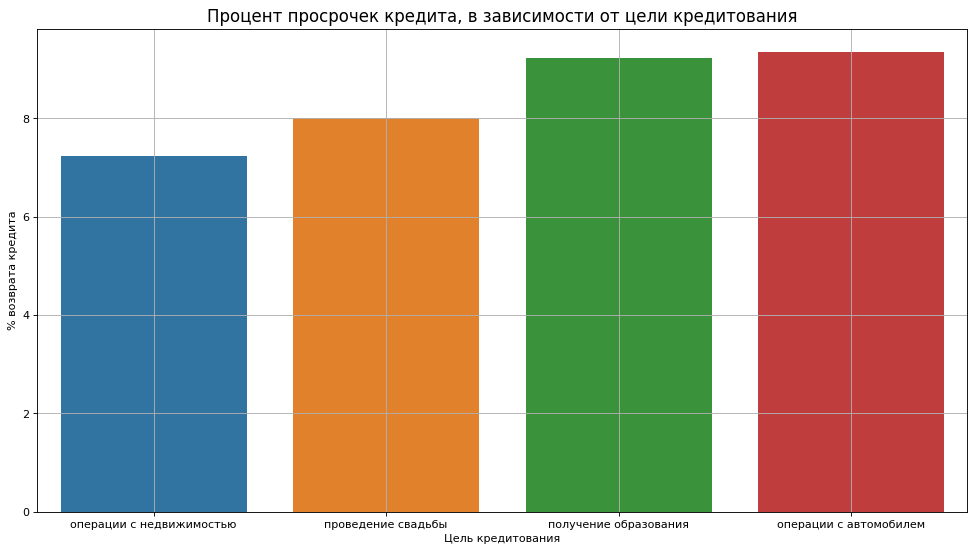

In [101]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.barplot(x=draw.index, y=draw['debt'])
ax.set_title('Процент просрочек кредита, в зависимости от цели кредитования', fontsize=15)
ax.set_ylabel('% возврата кредита', fontsize=10)
ax.set_xlabel('Цель кредитования', fontsize=10)
ax.tick_params(labelsize=10)
plt.grid()

Чаще всего просрочку допускают клиенты, которые берут деньги на операции с автомобилем, меньше всего клиенты цель которых операции с недвижимостью

### Ответы на вопросы.

##### Вопрос 1:

Есть ли зависимость между количеством детей и возвратом кредита в срок?

##### Вывод 1:

Утверждать что чем больше детей, тем выше щанс просрочки кредита, по момему мнению не обосновано, однако, все же стоит заметить, что те клиенты у которых нет детей, допускают просрочки все же немного реже чем те у кого они есть. Клиентов с 5 детьми всего пятеро, этого мало что-бы делать какие длибо выводы по даной группе, стоит правда отметить, что в этой группе, в этом конкретном датасете, небло просрочек )

##### Вопрос 2:

Есть ли зависимость между семейным положением и возвратом кредита в срок?

##### Вывод 2:

Странное наблюдение - клиенты, которые являются вдовами/вдовцами чаще всего платят кредит вовремя

Самый высокий процент просроченных кредитов - у не женатых/ не замужних клиентов

##### Вопрос 3:

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

##### Вывод 3:

Глядя на график, сразу бросается в глаза, что самый высокий процент просрочки кредита у категории E - клиентов с самым низким доходом, казалось бы что это вполне очевидно, однако следующей по величине идет категория клиентов со средним доходом. У категории людей с самым высоким уровнем дохода - средние показатели, меньше всех допускают просрочку клиенты с уровнем дохода - ниже среднего. Прямой зависимости от нулевой гипотезы, что чем ниже доход - тем выше шанс просрочки, не выявлено

##### Вопрос 4:

Как разные цели кредита влияют на его возврат в срок?

##### Вывод 4:

Чаще всего просрочку допускают клиенты, которые берут деньги на операции с автомобилем, меньше всего клиенты цель которых операции с недвижимостью

## Общий вывод:

В ходе исследованияв выявленны некоторые, довольно слабые зависимости которое я все же перечислю:
- обратная зависимость просрочки к трудовому стажу, чем выше стаж, тем меньше шанс просрочки
- обратная зависимость к возрасту дебитора
- Так же есть зависимость в уровне образования

- В представленном датасете, клиенты у которых 5 детей, не выходили на просрочку
- Не выявлено людей которые допускали просрочку, с трудовым стажем примерно от 9000 до 11000 дней, а так же выше 13 000. Напрашивается вывод, что чем выше стаж работы, тем выше шанс возврата кредита
- По возрасту расклад примерно одинаковый, однако люди старше 75 и выше в данном датасете не допускали просрочек.
- Люди с докторской степенью в данном датасете не допускали просрочек, особой зависимости от образования и наличие просрочек я не выявил.

Согласно проведенному исследованию, удалось утсановить, что:
 - самый "безопасный" для банка клиент - клиент, который берет деньги на операции с недвижимостью, при этом имеет доход категории D (от 30001 - 50000) вдовец или вдова, при этом без детей.

- самый "опасный" клиент для банка - клиент который берет деньги на операции с автомобилем, имеет самую низкую категорию дохода, не женат, либо в гражданском браке, при этом имеет больше 2ух детей.